# 6. Use Kaggle to find a data set on companies and develop a diversity score (using Python)

 SHWETA KHANJAN SHROFF 

  I have used Unsupervised Learning (clustering) to assess the diversity of employees in a company.This is a technique where the subjects are grouped together using their similarities as deemed fit by the algorithm (Here, KMeans Clustering Algorithm) I have used matplotlib for data visualisation.

  I have made an attempt to study diversity under two headings:
  RACE and 
  GENDER.
  
  First I have pre-processed the data to remove any NaN values from the dataset,changed the string data into numerical data for our Scikit-learn library to work on it.Then the KMeans Clustering algorithm is made to work on the data.
  This is followed by visualisation of the results and analysis.


In [92]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

Data source:https://www.kaggle.com/rtatman/silicon-valley-diversity-data?select=Reveal_EEO1_for_2016.csv

First we read the data into a pandas DataFrame.


In [93]:
data = pd.read_csv('Reveal_EEO1_for_2016.csv')
print(data.shape)
data.head(15)

(4500, 6)


,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
5,23andMe,2016,Hispanic_or_Latino,male,Administrative support,0
6,23andMe,2016,Hispanic_or_Latino,male,Craft workers,0
7,23andMe,2016,Hispanic_or_Latino,male,operatives,0
8,23andMe,2016,Hispanic_or_Latino,male,laborers and helpers,0
9,23andMe,2016,Hispanic_or_Latino,male,Service workers,0


We notice that there are NaN values, and remove them from the data.We print the size of the DataFrame.

In [94]:
data.dropna(inplace = True)
data.shape

(4200, 6)

Unwanted column is dropped.

In [95]:
data = data.drop(columns='year')
data

,company,race,gender,job_category,count
0,23andMe,Hispanic_or_Latino,male,Executives,0
1,23andMe,Hispanic_or_Latino,male,Managers,1
2,23andMe,Hispanic_or_Latino,male,Professionals,7
3,23andMe,Hispanic_or_Latino,male,Technicians,0
4,23andMe,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...
4483,Sanmina,White,male,laborers and helpers,2
4484,Sanmina,White,male,Service workers,32
4485,Sanmina,White,male,Totals,1821
4486,Sanmina,White,male,Previous_totals,1854


We create a new DataFrame that consists of total count of a particular type(race/gender) within a company.

In [96]:
data1 = data[data.job_category=='Totals']
data1

,company,race,gender,job_category,count
10,23andMe,Hispanic_or_Latino,male,Totals,8
22,23andMe,Hispanic_or_Latino,female,Totals,11
34,23andMe,White,male,Totals,102
46,23andMe,Black_or_African_American,male,Totals,2
58,23andMe,Native_Hawaiian_or_Pacific_Islander,male,Totals,0
...,...,...,...,...,...
4437,Sanmina,Native_Hawaiian_or_Pacific_Islander,male,Totals,6
4449,Sanmina,Two_or_more_races,female,Totals,7
4461,Sanmina,Two_or_more_races,male,Totals,19
4473,Sanmina,White,female,Totals,1188


#company,gender,count 

#company,race,count 


In [97]:
data2 = data1['company'].unique()
num=[i for i in range(len(data2))]
company=dict(zip(data2,num))
data1.replace(company,inplace=True)
data1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,company,race,gender,job_category,count
10,0,Hispanic_or_Latino,male,Totals,8
22,0,Hispanic_or_Latino,female,Totals,11
34,0,White,male,Totals,102
46,0,Black_or_African_American,male,Totals,2
58,0,Native_Hawaiian_or_Pacific_Islander,male,Totals,0
...,...,...,...,...,...
4437,24,Native_Hawaiian_or_Pacific_Islander,male,Totals,6
4449,24,Two_or_more_races,female,Totals,7
4461,24,Two_or_more_races,male,Totals,19
4473,24,White,female,Totals,1188


In [98]:
data3 = data1['race'].unique()
num=[i for i in range(len(data3))]
race=dict(zip(data3,num))
data1.replace(race,inplace=True)
data1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,company,race,gender,job_category,count
10,0,0,male,Totals,8
22,0,0,female,Totals,11
34,0,1,male,Totals,102
46,0,2,male,Totals,2
58,0,3,male,Totals,0
...,...,...,...,...,...
4437,24,3,male,Totals,6
4449,24,6,female,Totals,7
4461,24,6,male,Totals,19
4473,24,1,female,Totals,1188


In [99]:
data4 = data1['gender'].unique()
num=[i for i in range(len(data4))]
gender=dict(zip(data4,num))
data1.replace(gender,inplace=True)
data1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,company,race,gender,job_category,count
10,0,0,0,Totals,8
22,0,0,1,Totals,11
34,0,1,0,Totals,102
46,0,2,0,Totals,2
58,0,3,0,Totals,0
...,...,...,...,...,...
4437,24,3,0,Totals,6
4449,24,6,1,Totals,7
4461,24,6,0,Totals,19
4473,24,1,1,Totals,1188


In [100]:
X = data1.drop(columns=['race','job_category'])
X.head()

,company,gender,count
10,0,0,8
22,0,1,11
34,0,0,102
46,0,0,2
58,0,0,0


An elbow curve helps us to determine how many clusters would be ideal for the data.

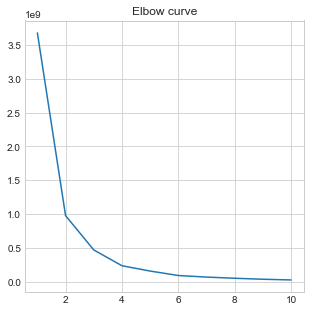

In [101]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow curve')
plt.show() 

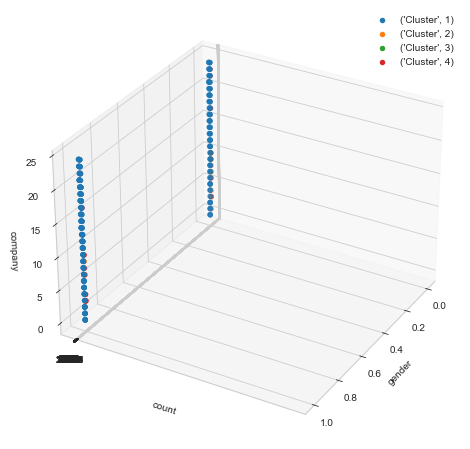

In [102]:
kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(4):
    ax.scatter(X['gender'][y_kmeans == i], X['count'][y_kmeans == i], X['company'][y_kmeans == i], label = ('Cluster', i+1))
plt.xlabel('gender')
plt.ylabel('count')
ax.set_zlabel('company')
ax.view_init(30,30) # we change the angles to get different views.
plt.legend()
plt.show()

The companies seem to be more or less equally diverse as far as gender is concerned.
Let us explore the dataset with respect to race,and visualise the data.

In [103]:
X = data1.drop(columns=['gender','job_category'])
X.head()

,company,race,count
10,0,0,8
22,0,0,11
34,0,1,102
46,0,2,2
58,0,3,0


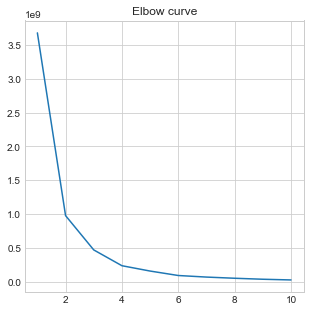

In [104]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow curve')
plt.show() 

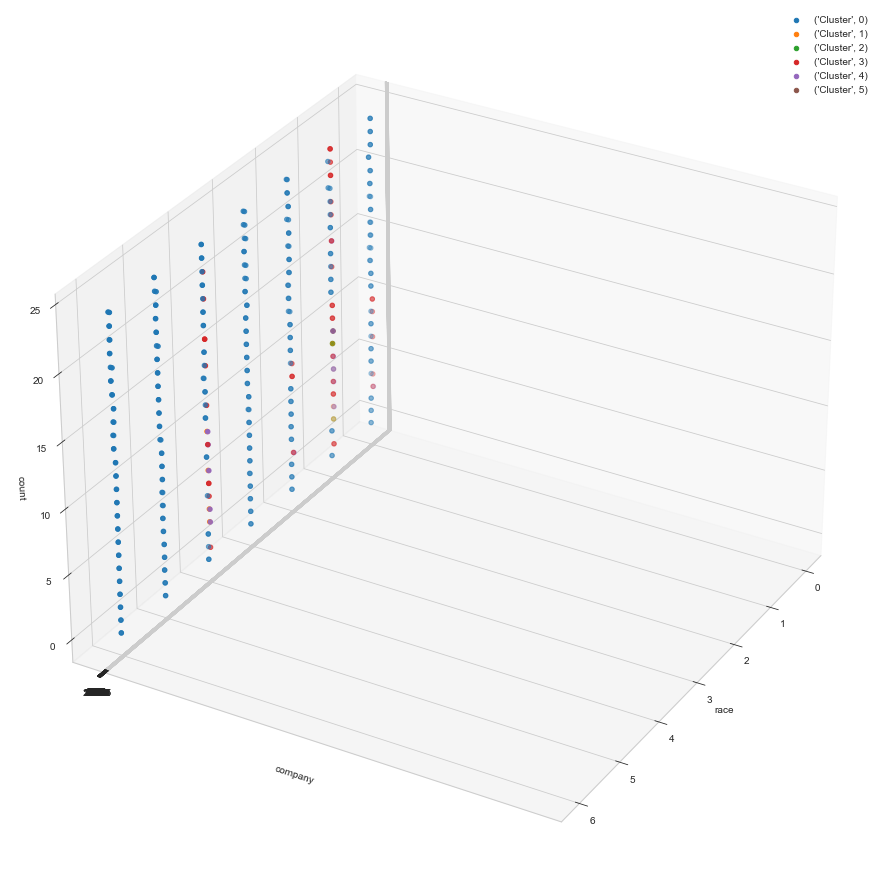

In [105]:
kmeans=KMeans(n_clusters=6,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)


fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
for i in range(6):
    ax.scatter(X['race'][y_kmeans == i], X['count'][y_kmeans == i], X['company'][y_kmeans == i], label = ('Cluster', i))
plt.xlabel('race')
plt.ylabel('company')
ax.set_zlabel('count')
ax.view_init(30,30) # we change the angles to get different views.
plt.legend()
plt.show()

cluster 0 loooks most diverse.

In [106]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = y_kmeans
cluster_map

,data_index,cluster
0,10,0
1,22,0
2,34,0
3,46,0
4,58,0
...,...,...
345,4437,0
346,4449,0
347,4461,0
348,4473,3


In [107]:
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
0,10,0
1,22,0
2,34,0
3,46,0
4,58,0
...,...,...
343,4413,0
344,4425,0
345,4437,0
346,4449,0


In [125]:
ind = cluster_map[cluster_map.cluster == 0].data_index.values
a=data.loc[ind]
print(a.company.unique())
a

['23andMe' 'Adobe' 'Airbnb' 'Apple' 'Cisco' 'eBay' 'Facebook' 'Google'
 'HP Inc.' 'HPE' 'Intel' 'Intuit' 'LinkedIn' 'Lyft' 'MobileIron' 'Nvidia'
 'Pinterest' 'Salesforce' 'Square' 'Twitter' 'Uber' 'View' 'PayPal'
 'NetApp' 'Sanmina']


,company,race,gender,job_category,count
10,23andMe,Hispanic_or_Latino,male,Totals,8
22,23andMe,Hispanic_or_Latino,female,Totals,11
34,23andMe,White,male,Totals,102
46,23andMe,Black_or_African_American,male,Totals,2
58,23andMe,Native_Hawaiian_or_Pacific_Islander,male,Totals,0
...,...,...,...,...,...
4413,Sanmina,Hispanic_or_Latino,male,Totals,411
4425,Sanmina,Native_Hawaiian_or_Pacific_Islander,female,Totals,5
4437,Sanmina,Native_Hawaiian_or_Pacific_Islander,male,Totals,6
4449,Sanmina,Two_or_more_races,female,Totals,7


In [130]:
a.sort_values(by="count",ascending=False)

,company,race,gender,job_category,count
2206,LinkedIn,Black_or_African_American,male,Totals,99
634,Apple,Two_or_more_races,male,Totals,981
1954,Intel,American_Indian_Alaskan_Native,female,Totals,93
2482,Lyft,Asian,female,Totals,90
1570,HP Inc.,Native_Hawaiian_or_Pacific_Islander,female,Totals,9
...,...,...,...,...,...
2578,MobileIron,Native_Hawaiian_or_Pacific_Islander,male,Totals,0
2674,MobileIron,American_Indian_Alaskan_Native,female,Totals,0
2938,Pinterest,Native_Hawaiian_or_Pacific_Islander,male,Totals,0
58,23andMe,Native_Hawaiian_or_Pacific_Islander,male,Totals,0


In [133]:
cluster_map[cluster_map.cluster == 1]
ind = cluster_map[cluster_map.cluster == 1].data_index.values
b=data.loc[ind]
print(b.company.unique())
b

['Apple' 'Cisco' 'Google' 'HPE' 'Intel']


,company,race,gender,job_category,count
610,Apple,Asian,male,Totals,10521
646,Apple,White,female,Totals,12207
754,Cisco,White,male,Totals,15502
790,Cisco,Asian,male,Totals,9722
1330,Google,Asian,male,Totals,10604
1726,HPE,White,female,Totals,12062
1870,Intel,Asian,male,Totals,13533


In [134]:
cluster_map[cluster_map.cluster == 2]
ind = cluster_map[cluster_map.cluster == 2].data_index.values
c=data.loc[ind]
print(c.company.unique())
c

['Apple' 'HPE']


,company,race,gender,job_category,count
574,Apple,White,male,Totals,31121
1654,HPE,White,male,Totals,25709


In [137]:
cluster_map[cluster_map.cluster == 3]
ind = cluster_map[cluster_map.cluster == 3].data_index.values
d=data.loc[ind]
print(d.shape)
print(d.company.unique())
d

(40, 5)
['Adobe' 'Apple' 'Cisco' 'eBay' 'Facebook' 'Google' 'HP Inc.' 'HPE'
 'Intel' 'Intuit' 'LinkedIn' 'Nvidia' 'Salesforce' 'Twitter' 'Uber'
 'PayPal' 'NetApp' 'Sanmina']


,company,race,gender,job_category,count
214,Adobe,White,male,Totals,3416
250,Adobe,Asian,male,Totals,1121
286,Adobe,White,female,Totals,1337
562,Apple,Hispanic_or_Latino,female,Totals,3171
658,Apple,Black_or_African_American,female,Totals,2964
730,Cisco,Hispanic_or_Latino,male,Totals,1289
934,eBay,White,male,Totals,2188
970,eBay,Asian,male,Totals,1775
1006,eBay,White,female,Totals,1298
1150,Facebook,Asian,male,Totals,2907


In [139]:
cluster_map[cluster_map.cluster == 4]
ind = cluster_map[cluster_map.cluster == 4].data_index.values
e=data.loc[ind]
print(d.shape)
print(e.company.unique())
e

(40, 5)
['Apple' 'Cisco' 'Facebook' 'Google' 'HP Inc.' 'HPE' 'Intel' 'Salesforce']


,company,race,gender,job_category,count
550,Apple,Hispanic_or_Latino,male,Totals,6300
586,Apple,Black_or_African_American,male,Totals,4103
682,Apple,Asian,female,Totals,4517
826,Cisco,White,female,Totals,4842
862,Cisco,Asian,female,Totals,3769
1114,Facebook,White,male,Totals,4117
1366,Google,White,female,Totals,6962
1402,Google,Asian,female,Totals,5044
1474,HP Inc.,White,male,Totals,7066
1690,HPE,Asian,male,Totals,4565


In [140]:
cluster_map[cluster_map.cluster == 5]
ind = cluster_map[cluster_map.cluster == 5].data_index.values
f=data.loc[ind]
print(f.shape)
print(f.company.unique())
f

(2, 5)
['Google' 'Intel']


,company,race,gender,job_category,count
1294,Google,White,male,Totals,19625
1834,Intel,White,male,Totals,20965


Diversity is a very abstarct topic and can be defined in several different ways. 
Here I have tried to study how a company employs the minorities and females.In cluster 0, there is a maximum number of Native_Hawaiian_or_Pacific_Islander  or Hispanic_or_Latino subjects.Also, there are people from two or more races.Thus, this group is very diverse with respect to race. I have studied the companies they belong to, and found that they ate mostly employed by:

'23andMe' 'Adobe' 'Airbnb' 'Apple' 'Cisco' 'eBay' 'Facebook' 'Google'
 'HP Inc.' 'HPE' 'Intel' 'Intuit' 'LinkedIn' 'Lyft' 'MobileIron' 'Nvidia'
 'Pinterest' 'Salesforce' 'Square' 'Twitter' 'Uber' 'View' 'PayPal'
 'NetApp' 'Sanmina'
 
The least diverse group with respect to race are cluster 2 and cluster 5, with company names of :

 'Apple','HPE','Google' and 'Intel'
 
 All the other companies lie somewhere in-between as far as their score with respect to diversity in race is concerned.
 
 Thus, I would rank the companies as follows:
 
MOST DIVERSE:

 '23andMe' 'Adobe' 'Airbnb' 'Cisco' 'eBay'  
 'HP Inc.'  'Intuit'  'MobileIron' 
 'Pinterest'   'View' 'PayPal'
 'NetApp' 'Sanmina'
 
 
 
MEDIUM RANGE OF DIVERSITY:

 'Cisco','Intel''Adobe' 'Apple' 'Cisco' 'eBay' 'Facebook' 'Google' 'HP Inc.' 'HPE'
 'Intel' 'Intuit' 'LinkedIn' 'Nvidia' 'Salesforce' 'Twitter' 'Uber'
 'PayPal' 'NetApp' 'Sanmina''Apple'  'HP Inc.' 'HPE' 'Salesforce'
 
 LEAST DIVERSE:

 'Apple','HPE','Google' and 'Intel'
 
CONCLUSION :
 
I would rate '23andMe','MobileIron','Pinterest'and 'NetApp'as most diverse as they ALMOST EXCLUSIVELY belong to cluster 0 which is racially the most diverse.

Some companies like 'Cisco','Intel','Intuit','Sanmina'belong to two categories.I would group them under medium range of diversity.

'Apple','HPE','Google' and 'Intel'must buck up and have more diversity and inclusiveness in their workforce.

WHAT CAN I DO MORE GIVEN MORE TIME:
I can quantify their ranks based on, maybe, calculations on numpy array or pandas DataFrame, but I thought I would just have an overall idea about the diversity at these workplaces and so went about an analysis using unsupervised machine learning(clustering). 
 